## Random Forest Classifier  

Classifying network traffic flows as either benign or a specific attack type using Random Forest on the CIC IDS 2018 dataset

Achieves perfect accuracy as is expected when operating on such a rich labeled dataset

#### Imports

In [8]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import collections
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

#### Data Loading

In [9]:
# Provide the path to one CSVs from the CICIDS2018 dataset correlating to one day of traffic

path_1 = 'C:/Users/theob/Code/COS-475-Project/Dataset/CSE-CIC-IDS2018/Wednesday-14-02-2018_TrafficForML_CICFlowMeter.csv'
flows_1 = pd.read_csv(path_1)

#### Data Cleaning

In [10]:
def clean_dataframe(df):
    # Cleans the given DataFrame by:
    # - Removing columns that contain only zero values.
    # - Removing rows that contain any inf, -inf, or negative values in numeric columns only.

    # Initial state reporting
    initial_columns_count = df.shape[1]
    initial_rows_count = df.shape[0]
    
    # Step 1: Remove columns that contain only zero values
    df = df.loc[:, (df != 0).any(axis=0)]
    
    # Select only numeric columns for inf, -inf, or negative values removal
    numeric_cols = df.select_dtypes(include=[np.number])
    
    # Step 2: Remove rows with any inf, -inf in numeric columns
    df = df[~numeric_cols.isin([np.inf, -np.inf]).any(axis=1)]
    
    # Remove rows with negative values in numeric columns
    df = df[(numeric_cols.ge(0)).all(axis=1)]

    # Final state reporting
    final_columns_count = df.shape[1]
    final_rows_count = df.shape[0]

    print(f"Initial number of columns: {initial_columns_count}, final number of columns: {final_columns_count}")
    print(f"Initial number of rows: {initial_rows_count}, final number of rows: {final_rows_count}")

    return df

def encode_labels(labels):
    # Converts a list of labels into integer format where each unique label is assigned a unique integer.
    # Additionally, prints the total number of unique labels and the number of occurrences of each label.

    # Create a dictionary to map each label to a unique integer
    unique_labels = sorted(set(labels))
    label_mapping = {label: i for i, label in enumerate(unique_labels)}

    # Count occurrences of each label
    label_counts = collections.Counter(labels)
    
    # Print the total number of unique labels and occurrences of each
    print(f"Total number of unique labels: {len(unique_labels)}")
    print("Occurrences of each label:")
    for label, count in sorted(label_counts.items(), key=lambda x: label_mapping[x[0]]):
        print(f"{label}: {count}")

    # Apply the mapping to the labels list to create the encoded labels list
    encoded_labels = [label_mapping[label] for label in labels]

    return encoded_labels

# Encode and separate the labels from the features
flows_1['Label'] = encode_labels(flows_1['Label'])

# Clean the feature space
flows_1_reduced = clean_dataframe(flows_1.drop(['Timestamp'], axis=1))

Total number of unique labels: 3
Occurrences of each label:
Benign: 667626
FTP-BruteForce: 193360
SSH-Bruteforce: 187589


C:\Users\theob\AppData\Local\Temp\ipykernel_20272\2650430313.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[(numeric_cols.ge(0)).all(axis=1)]


Initial number of columns: 79, final number of columns: 69
Initial number of rows: 1048575, final number of rows: 701143


#### Separate Labels

In [11]:
flow_1_labels = flows_1_reduced['Label']

#### Data Scaling

In [12]:
def apply_minmax_scaler(dataframe):
    # Create an instance of MinMaxScaler
    scaler = MinMaxScaler()

    # Fit the scaler to the data and transform it
    scaled_data = scaler.fit_transform(dataframe)

    # Convert the scaled array back to a DataFrame
    scaled_dataframe = pd.DataFrame(scaled_data, columns=dataframe.columns)

    return scaled_dataframe

flows_1_scaled = apply_minmax_scaler(flows_1_reduced)

#### Train and Predict

In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(flows_1_scaled, flow_1_labels, test_size=0.95, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train.values.ravel())

# Predict on the test data
y_pred = rf_classifier.predict(X_test)

#### Results

Accuracy: 100.00%
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


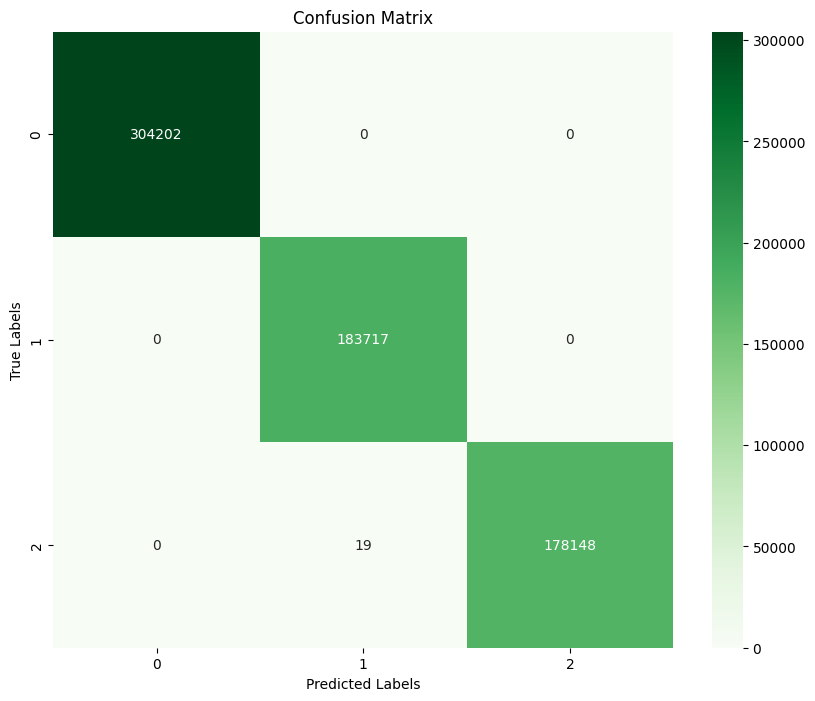

In [14]:
accuracy = accuracy_score(y_test, y_pred)

# Setting average='weighted' to account for label imbalance:
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the calculated metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Plotting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))  # Adjust size for better visibility with more classes
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens')  # Greens for visual distinction
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()